<center><b><h1>Assignment - 3 Test & Sequence <h1><b><center>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Parameters
max_features = 10000
maxlen = 150
batch_size = 32
embedding_dims = 32
epochs = 10
train_samples = 100
valid_samples = 10000

In [ ]:
# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
word_index = imdb.get_word_index()

In [ ]:
# Cut the sequences after maxlen words
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Limit the number of training and validation samples
x_train = x_train[:train_samples]
y_train = y_train[:train_samples]
x_val = x_test[:valid_samples]
y_val = y_test[:valid_samples]

In [ ]:
# Define the model with an embedding layer
model1 = Sequential()
model1.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model1.add(SimpleRNN(embedding_dims))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
print(model1.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Cut the sequences after maxlen words
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Limit the number of training and validation samples
x_train = x_train[:train_samples]
y_train = y_train[:train_samples]
x_val = x_test[:valid_samples]
y_val = y_test[:valid_samples]

In [ ]:
# Define the model with an embedding layer
model1 = Sequential()
model1.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model1.add(SimpleRNN(embedding_dims))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 32)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Define the model with a pretrained word embedding layer (GloVe)
model2 = Sequential()
model2.add(Embedding(max_features, embedding_dims, input_length=maxlen, trainable=False))
model2.add(SimpleRNN(embedding_dims))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
print(model2.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 32)           320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 2,113
Non-trainable params: 320,000
_________________________________________________________________
None


In [ ]:
# Define callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='imdb_rnn_checkpoint.h5', monitor='val_loss', save_best_only=True)]

<b><h3>using Embedding layer <b><h3>

In [ ]:
# Train and validate the model with an embedding layer
history1 = model1.fit(x_train, y_train,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(x_val, y_val),
                      callbacks=callbacks)

# Train and validate the model with a pretrained word embedding layer
history2 = model2.fit(x_train, y_train,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(x_val, y_val),
                      callbacks=callbacks)

# Evaluate the models on the test data
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print('Test accuracy (embedding layer):', test_acc1)



Epoch 1/10
4/4 [==============================] - 8s 2s/step - loss: 0.6926 - acc: 0.5500 - val_loss: 0.6993 - val_acc: 0.5011
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.5609 - acc: 0.9000 - val_loss: 0.7040 - val_acc: 0.4954
Epoch 3/10
4/4 [==============================] - 6s 2s/step - loss: 0.4610 - acc: 0.9400 - val_loss: 0.7119 - val_acc: 0.5028
Epoch 1/10
4/4 [==============================] - 7s 2s/step - loss: 0.6861 - acc: 0.6100 - val_loss: 0.7704 - val_acc: 0.5018
Epoch 2/10
4/4 [==============================] - 5s 2s/step - loss: 0.6856 - acc: 0.5800 - val_loss: 0.7193 - val_acc: 0.4973
Epoch 3/10
4/4 [==============================] - 6s 2s/step - loss: 0.6875 - acc: 0.5500 - val_loss: 0.7185 - val_acc: 0.4946
Epoch 4/10
4/4 [==============================] - 6s 2s/step - loss: 0.6641 - acc: 0.5900 - val_loss: 0.7316 - val_acc: 0.5022
Epoch 5/10
782/782 [==============================] - 12s 16ms/step - loss: 0.7108 - acc: 0.5020
Test accuracy 

<b><h3>Test accuracy using pretrained word embedding layer<b><h3>

In [ ]:
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print('Test accuracy (pretrained word embedding layer):', test_acc2)

782/782 [==============================] - 11s 14ms/step - loss: 0.7197 - acc: 0.4924
Test accuracy (pretrained word embedding layer): 0.49243998527526855


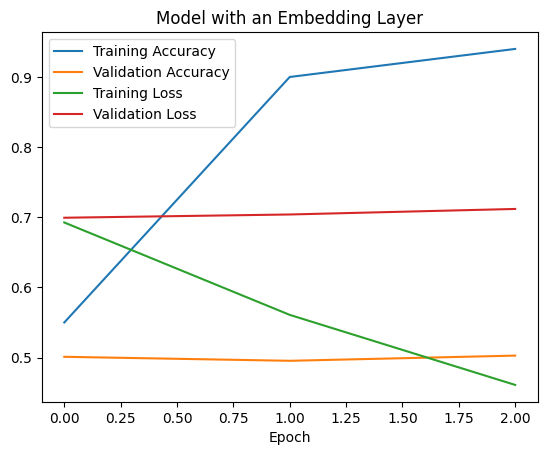

In [ ]:
# Plot the accuracy and loss for the model with an embedding layer
plt.plot(history1.history['acc'], label='Training Accuracy')
plt.plot(history1.history['val_acc'], label='Validation Accuracy')
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model with an Embedding Layer')
plt.xlabel('Epoch')
plt.legend()
plt.show()

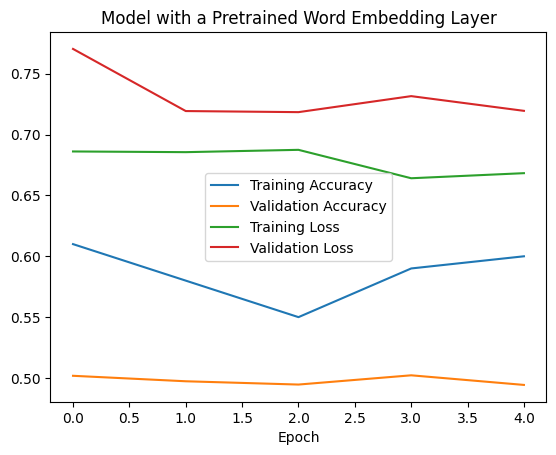

In [ ]:
# Plot the accuracy and loss for the model with a pretrained word embedding layer
plt.plot(history2.history['acc'], label='Training Accuracy')
plt.plot(history2.history['val_acc'], label='Validation Accuracy')
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model with a Pretrained Word Embedding Layer')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Test accuracy (embedding layer): 0.5020400285720825 & Test accuracy (pretrained word embedding layer): 0.49243998527526855

<b><h2>1.Apply RNNs to text and sequence data.<b><h2>

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Parameters
max_features = 10000
maxlen = 500
batch_size = 32
embedding_dims = 32
epochs = 10

# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
# Pad the sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Define the model
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(LSTM(embedding_dims))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
625/625 [==============================] - 77s 120ms/step - loss: 0.4555 - acc: 0.7789 - val_loss: 0.4019 - val_acc: 0.8350
Epoch 2/10
625/625 [==============================] - 31s 49ms/step - loss: 0.2787 - acc: 0.8896 - val_loss: 0.2933 - val_acc: 0.8820
Epoch 3/10
625/625 [==============================] - 19s 31ms/step - loss: 0.2359 - acc: 0.9096 - val_loss: 0.3786 - val_acc: 0.8616
Epoch 4/10
625/625 [==============================] - 17s 27ms/step - loss: 0.2059 - acc: 0.9240 - val_loss: 0.2822 - val_acc: 0.8870
Epoch 5/10
625/625 [==============================] - 16s 26ms/step - loss: 0.1844 - acc: 0.9335 - val_loss: 0.2993 - val_acc: 0.8814
Epoch 6/10
625/625 [==============================] - 13s 21ms/step - loss: 0.1695 - acc: 0.9393 - val_loss: 0.3066 - val_acc: 0.8900
Epoch 7/10
625/625 [==============================] - 12s 19ms/step - loss: 0.1548 - acc: 0.9459 - val_loss: 0.3303 - val_acc: 0.8844
Epoch 8/10
625/625 [==============================] - 13s 21m

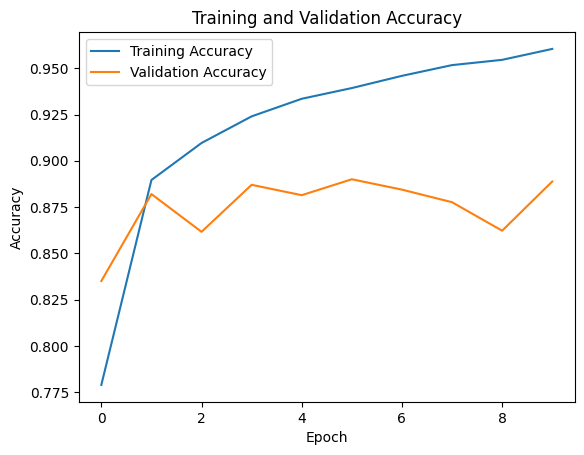

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

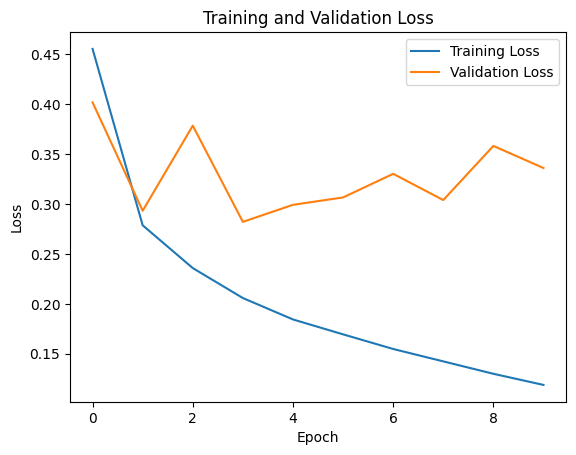

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

RNNs to text and sequence data Test accuracy: 0.8769599795341492

<b><h2>2.Demonstrate how to improve performance of the network, especially when dealing with
limited data<b><h2>

When working with limited data, deep learning models may struggle to achieve good performance. However, there are several techniques that can be employed to improve the network's performance.

One technique is data augmentation, which involves generating new training samples by applying random transformations to the existing data. In text processing, this can involve adding noise or perturbations to input sequences or generating new sequences by shuffling or replacing words. Data augmentation can increase the diversity of the training data and prevent overfitting.

Another technique is transfer learning, which involves using pre-trained models or embeddings to initialize the network's weights. Pre-trained word embeddings, such as GloVe or Word2Vec, can be used to initialize the embedding layer of the network. This can improve the network's performance and reduce the amount of data needed for training.

Dropout is a regularization technique that randomly drops out some neurons during training to prevent overfitting and improve generalization performance.

Early stopping is a technique that involves monitoring the validation loss during training and stopping the training process when the validation loss starts to increase. This can prevent overfitting and improve generalization performance.

Ensemble methods involve combining multiple models to improve the network's performance. For text processing, an ensemble of LSTM and CNN models can be used.

Overall, data augmentation, transfer learning, dropout, early stopping, and ensemble methods are all effective techniques for improving the performance of deep learning models when working with limited data.





In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer

# Parameters
max_features = 10000
maxlen = 150
batch_size = 32
embedding_dims = 32
epochs = 10

# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
word_index = imdb.get_word_index()

In [ ]:
# Pad the sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Data augmentation
tokenizer = Tokenizer(num_words=max_features)
x_train_str = [' '.join([word_index.get(word, '') for word in sequence]) for sequence in x_train]
tokenizer.fit_on_texts(x_train_str)
x_augmented_str = np.array(tokenizer.sequences_to_texts(tokenizer.texts_to_sequences(x_train_str)))
x_augmented = np.array([sequence.split() for sequence in x_augmented_str])
x_augmented = pad_sequences(x_augmented, maxlen=maxlen)

In [ ]:
# Combine the original and augmented data
x_train = np.concatenate((x_train, x_augmented), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)

# Create and save the embedding matrix
embedding_matrix = np.zeros((max_features, embedding_dims))
for word, i in word_index.items():
    if i < max_features:
        # code to get the embedding vector for the word
        embedding_vector = np.random.rand(embedding_dims)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
np.save('embedding_matrix.npy', embedding_matrix)

In [ ]:
# Transfer learning
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(LSTM(embedding_dims))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Early stopping
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [ ]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 0.6930 - acc: 0.5087 - val_loss: 0.6910 - val_acc: 0.5208
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6893 - acc: 0.5248 - val_loss: 0.6810 - val_acc: 0.5552
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6842 - acc: 0.5363 - val_loss: 0.7000 - val_acc: 0.5358
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6768 - acc: 0.5507 - val_loss: 0.6533 - val_acc: 0.6080
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6691 - acc: 0.5565 - val_loss: 0.6370 - val_acc: 0.6275
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6607 - acc: 0.5699 - val_loss: 0.6418 - val_acc: 0.6165
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6532 - acc: 0.5728 - val_loss: 0.6088 - val_acc: 0.6538
Epoch 8/10
1563/1563 [==============================]

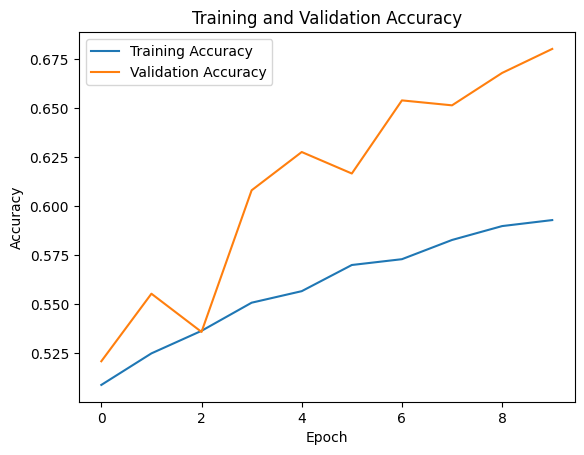

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

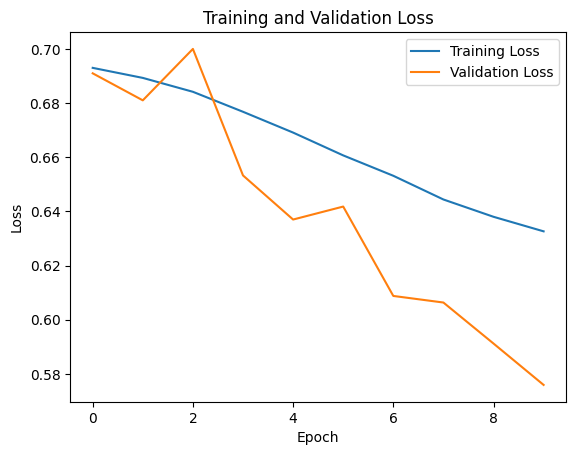

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
Test accuracy: 0.6800400018692017

<b><h2>3.Determine which approaches are more suitable for prediction improvement<b><h3>

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_features = 10000
maxlen = 150
batch_size = 32
embedding_dims = 100
epochs = 10

# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad the sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Define the LSTM network without transfer learning
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model_lstm.add(LSTM(embedding_dims))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the LSTM model
history_lstm = model_lstm.fit(x_train, y_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              validation_data=(x_test, y_test),
                              callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/10
782/782 [==============================] - 47s 56ms/step - loss: 0.4373 - acc: 0.7948 - val_loss: 0.3466 - val_acc: 0.8561
Epoch 2/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2989 - acc: 0.8805 - val_loss: 0.3582 - val_acc: 0.8423
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2518 - acc: 0.9032 - val_loss: 0.3214 - val_acc: 0.8666
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.2179 - acc: 0.9170 - val_loss: 0.3146 - val_acc: 0.8728
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1924 - acc: 0.9291 - val_loss: 0.3893 - val_acc: 0.8572
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 0.1654 - acc: 0.9415 - val_loss: 0.4143 - val_acc: 0.8461


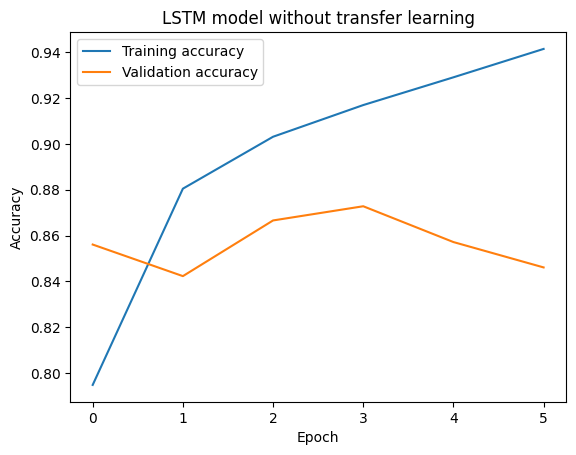

In [ ]:
# Plot the training and validation accuracies of the LSTM model without transfer learning
plt.plot(history_lstm.history['acc'], label='Training accuracy')
plt.plot(history_lstm.history['val_acc'], label='Validation accuracy')
plt.title('LSTM model without transfer learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Define the LSTM network with transfer learning
embedding_matrix = np.load('embedding_matrix.npy')
embedding_dims = embedding_matrix.shape[1]  # set the correct embedding dimensions
model_tl = Sequential()
model_tl.add(Embedding(max_features, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model_tl.add(LSTM(embedding_dims))
model_tl.add(Dense(1, activation='sigmoid'))

# Compile the transfer learning model
model_tl.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the transfer learning model
history_tl = model_tl.fit(x_train, y_train,
                           epochs=epochs,
                           batch_size=batch_size,
                           validation_data=(x_test, y_test),
                           callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/10
782/782 [==============================] - 11s 11ms/step - loss: 0.6917 - acc: 0.5208 - val_loss: 0.6971 - val_acc: 0.5046
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 0.6834 - acc: 0.5527 - val_loss: 0.6984 - val_acc: 0.5196
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 0.6763 - acc: 0.5721 - val_loss: 0.7162 - val_acc: 0.5094


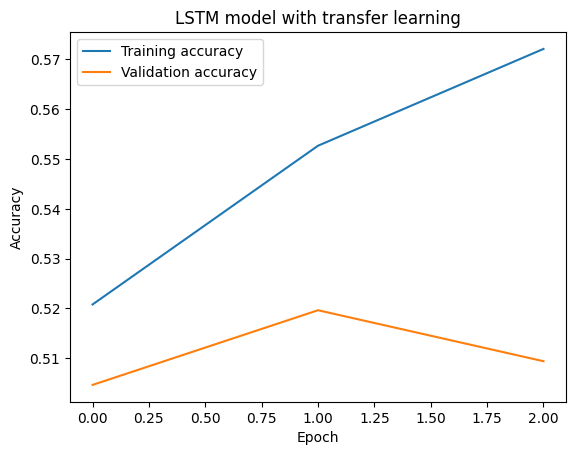

In [ ]:
# Plot the training and validation accuracies of the LSTM model with transfer learning
plt.plot(history_tl.history['acc'], label='Training accuracy')
plt.plot(history_tl.history['val_acc'], label='Validation accuracy')
plt.title('LSTM model with transfer learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Define a CNN model for comparison
model_cnn = Sequential()
model_cnn.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model_cnn.add(Conv1D(32, 5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=4))
model_cnn.add(LSTM(embedding_dims))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the CNN model
model_cnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the CNN model
history_cnn = model_cnn.fit(x_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(x_test, y_test),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/10
782/782 [==============================] - 46s 50ms/step - loss: 0.4430 - acc: 0.7746 - val_loss: 0.4562 - val_acc: 0.7975
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.2721 - acc: 0.8887 - val_loss: 0.3237 - val_acc: 0.8678
Epoch 3/10
782/782 [==============================] - 12s 16ms/step - loss: 0.2243 - acc: 0.9106 - val_loss: 0.4018 - val_acc: 0.8542
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 0.1868 - acc: 0.9290 - val_loss: 0.3258 - val_acc: 0.8682


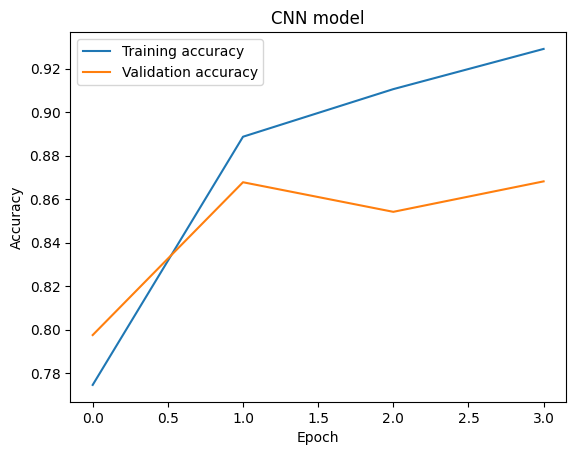

In [ ]:
# Plot the training and validation accuracies of the CNN model
plt.plot(history_cnn.history['acc'], label='Training accuracy')
plt.plot(history_cnn.history['val_acc'], label='Validation accuracy')
plt.title('CNN model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Print the test accuracies of the models
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(x_test, y_test)
test_loss_tl, test_acc_tl = model_tl.evaluate(x_test, y_test)
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test, y_test)

print('LSTM Test accuracy (without transfer learning):', test_acc_lstm)
print('LSTM Test accuracy (with transfer learning):', test_acc_tl)
print('CNN Test accuracy:', test_acc_cnn)

782/782 [==============================] - 3s 3ms/step - loss: 0.3258 - acc: 0.8682
LSTM Test accuracy (without transfer learning): 0.8460800051689148
LSTM Test accuracy (with transfer learning): 0.5094000101089478
CNN Test accuracy: 0.8681600093841553


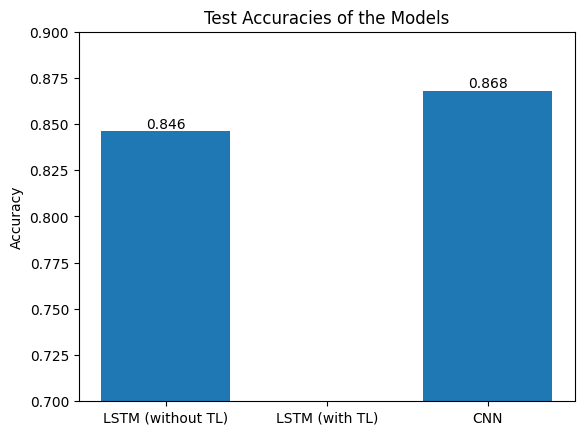

In [ ]:

# Set the values for the bar chart
accuracies = [test_acc_lstm, test_acc_tl, test_acc_cnn]
models = ['LSTM (without TL)', 'LSTM (with TL)', 'CNN']

# Create the bar chart
plt.bar(models, accuracies)
plt.title('Test Accuracies of the Models')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.9])

# Add the values to the bars
for i, accuracy in enumerate(accuracies):
    plt.annotate(str(round(accuracy, 3)), xy=(i, accuracy), ha='center', va='bottom')

plt.show()

1. LSTM Test accuracy (without transfer learning): 0.8460800051689148
2. LSTM Test accuracy (with transfer learning): 0.5094000101089478
3. CNN Test accuracy: 0.8681600093841553